# Success Enterprises - Análise do comportamento de vendas durante a pandemia

### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
import io



## Parte A

##### Importando a base de dados pulando as 3 primeiras linhas

In [2]:
df = pd.read_excel(r'C:\Users\campe\Documents\Prova estágio\pmc.xlsx', skiprows = range(0,3))

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Brasil,Ceará,Pernambuco,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Goiás,Distrito Federal
0,janeiro 2000,Índice de volume de vendas no comércio varejis...,Combustíveis e lubrificantes,79.8,62.0,61.2,82.1,84.3,144.9,101.3,89.1,70.7,62.5,102.9,101.2,63.2
1,NaN,NaN,"Hipermercados, supermercados, produtos aliment...",54.3,45.8,64.8,61.8,51.8,42.7,64.6,49.4,63.2,57.0,70.5,51.4,74.6
2,NaN,NaN,"Tecidos, vestuário e calçados",47.2,36.3,36.0,37.2,49.5,52.2,61.2,49.0,54.7,35.9,55.5,40.0,63.0
3,NaN,NaN,Móveis e eletrodomésticos,24.9,14.8,17.3,16.5,16.5,28.4,35.2,27.8,32.4,33.2,30.3,22.9,29.5
4,NaN,NaN,"Artigos farmacêuticos, médicos, ortopédicos, d...",-,-,-,-,-,-,-,-,-,-,-,-,-


##### Renomeando as colunas

In [4]:
lista = ['data', 'var', 'setor', 'BR', 'CE', 'PE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'GO', 'DF']

df.columns = lista

##### Convertendo os valores das colunas (BR e siglas de estados) para a classe numérica float

In [5]:
lista_BR = []
lista_CE = []
lista_PE = []
lista_BA = []
lista_MG = []
lista_ES = []
lista_RJ = []
lista_SP = []
lista_PR = []
lista_SC = []
lista_RS = []
lista_GO = []
lista_DF = []

for valor in df['BR']:
    if valor == '-':
        valor = None
    else:
        valor = float(valor)
    lista_BR.append(valor)
    
    
for valor in df['CE']:
    if valor == '-':
        valor = None
    else:
        valor = float(valor)
    lista_CE.append(valor)
    
    
for valor in df['PE']:
    if valor == '-':
        valor = None
    else:
        valor = float(valor)
    lista_PE.append(valor)
    
    
for valor in df['BA']:
    if valor == '-':
        valor = None
    else:
        valor = float(valor)
    lista_BA.append(valor)
    
    
for valor in df['MG']:
    if valor == '-':
        valor = None
    else:
        valor = float(valor)
    lista_MG.append(valor)
    
    
for valor in df['ES']:
    if valor == '-':
        valor = None
    else:
        valor = float(valor)
    lista_ES.append(valor)
    
    
for valor in df['RJ']:
    if valor == '-':
        valor = None
    else:
        valor = float(valor)
    lista_RJ.append(valor)
    
    
for valor in df['SP']:
    if valor == '-':
        valor = None
    else:
        valor = float(valor)
    lista_SP.append(valor)
    
    
for valor in df['PR']:
    if valor == '-':
        valor = None
    else:
        valor = float(valor)
    lista_PR.append(valor)
    
    
for valor in df['SC']:
    if valor == '-':
        valor = None
    else:
        valor = float(valor)
    lista_SC.append(valor)
    
    
for valor in df['RS']:
    if valor == '-':
        valor = None
    else:
        valor = float(valor)
    lista_RS.append(valor)
    
    
for valor in df['GO']:
    if valor == '-':
        valor = None
    else:
        valor = float(valor)
    lista_GO.append(valor)
    
    
for valor in df['DF']:
    if valor == '-':
        valor = None
    else:
        valor = float(valor)
    lista_DF.append(valor)
       
    
df['BR'] = lista_BR
df['CE'] = lista_CE
df['PE'] = lista_PE
df['BA'] = lista_BA
df['MG'] = lista_MG
df['ES'] = lista_ES
df['RJ'] = lista_RJ
df['SP'] = lista_SP
df['PR'] = lista_PR
df['SC'] = lista_SC
df['RS'] = lista_RS
df['GO'] = lista_GO
df['DF'] = lista_DF

In [6]:
df.info() # confirmando conversão

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    264 non-null    object 
 1   var     526 non-null    object 
 2   setor   4208 non-null   object 
 3   BR      3920 non-null   float64
 4   CE      3824 non-null   float64
 5   PE      3824 non-null   float64
 6   BA      3824 non-null   float64
 7   MG      3824 non-null   float64
 8   ES      3824 non-null   float64
 9   RJ      3824 non-null   float64
 10  SP      3824 non-null   float64
 11  PR      3824 non-null   float64
 12  SC      3824 non-null   float64
 13  RS      3824 non-null   float64
 14  GO      3824 non-null   float64
 15  DF      3824 non-null   float64
dtypes: float64(13), object(3)
memory usage: 526.2+ KB


##### Categorizando as variáveis em receita ou volume e eliminando os dados faltantes

In [7]:
df.head()

,data,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,PR,SC,RS,GO,DF
0,janeiro 2000,Índice de volume de vendas no comércio varejis...,Combustíveis e lubrificantes,79.8,62.0,61.2,82.1,84.3,144.9,101.3,89.1,70.7,62.5,102.9,101.2,63.2
1,NaN,NaN,"Hipermercados, supermercados, produtos aliment...",54.3,45.8,64.8,61.8,51.8,42.7,64.6,49.4,63.2,57.0,70.5,51.4,74.6
2,NaN,NaN,"Tecidos, vestuário e calçados",47.2,36.3,36.0,37.2,49.5,52.2,61.2,49.0,54.7,35.9,55.5,40.0,63.0
3,NaN,NaN,Móveis e eletrodomésticos,24.9,14.8,17.3,16.5,16.5,28.4,35.2,27.8,32.4,33.2,30.3,22.9,29.5
4,NaN,NaN,"Artigos farmacêuticos, médicos, ortopédicos, d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.tail()

,data,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,PR,SC,RS,GO,DF
4204,NaN,NaN,"Artigos farmacêuticos, médicos, ortopédicos, d...",198.6,194.8,231.0,181.0,262.1,242.0,166.6,191.8,236.1,237.4,191.5,205.5,168.3
4205,NaN,NaN,"Livros, jornais, revistas e papelaria",41.9,24.3,25.6,30.8,60.1,34.2,54.4,35.1,60.7,74.1,41.5,33.4,23.4
4206,NaN,NaN,"Equipamentos e materiais para escritório, info...",82.1,86.0,111.8,56.1,97.7,356.2,86.0,59.4,89.9,113.5,74.0,77.5,36.4
4207,NaN,NaN,Outros artigos de uso pessoal e doméstico,207.4,174.1,256.3,204.2,230.9,135.1,197.3,199.1,211.7,229.6,262.5,220.8,342.1
4208,Fonte: IBGE - Pesquisa Mensal de Comércio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df.drop(4208)
lista_completar = []

volume = 'Volume'
receita = 'Receita'
quantidade_vezes = 4208 // 16 

lista_de_listas = [(volume[:6] + '').split(',') * 8, (receita[:7] + '').split(',') * 8] * quantidade_vezes


for sublista in lista_de_listas:
    for item in sublista:
        lista_completar.append(item)

df['var'] = lista_completar

##### Convertendo as datas para DateTime e eliminando os dados faltantes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4208 entries, 0 to 4207
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    263 non-null    object 
 1   var     4208 non-null   object 
 2   setor   4208 non-null   object 
 3   BR      3920 non-null   float64
 4   CE      3824 non-null   float64
 5   PE      3824 non-null   float64
 6   BA      3824 non-null   float64
 7   MG      3824 non-null   float64
 8   ES      3824 non-null   float64
 9   RJ      3824 non-null   float64
 10  SP      3824 non-null   float64
 11  PR      3824 non-null   float64
 12  SC      3824 non-null   float64
 13  RS      3824 non-null   float64
 14  GO      3824 non-null   float64
 15  DF      3824 non-null   float64
dtypes: float64(13), object(3)
memory usage: 558.9+ KB


In [11]:
lista_final_pt = []
lista_de_listas = []
quantidade_repeticoes = 16
zero = '0'

df['data'] = df['data'].fillna(0)
df['data'] = df['data'].astype(str)

for valor in df['data']:
    if valor != '0':
        lista_de_listas.append(valor.split(',') * quantidade_repeticoes)


for sublista in lista_de_listas:
    for item in sublista:
        lista_final_pt.append(item)

        
lista_split = []
lista_final_en = []

for data_pt in lista_final_pt:
    lista_split.append(data_pt.split(' '))

for sublista in lista_split:
    if sublista[0] == 'janeiro':
        sublista[0] = 'january'
    elif sublista[0] == 'fevereiro':
        sublista[0] = 'february'
    elif sublista[0] == 'março':
        sublista[0] = 'march'
    elif sublista[0] == 'abril':
        sublista[0] = 'april'
    elif sublista[0] == 'maio':
        sublista[0] = 'may'
    elif sublista[0] == 'junho':
        sublista[0] = 'june'
    elif sublista[0] == 'julho':
        sublista[0] = 'july'
    elif sublista[0] == 'agosto':
        sublista[0] = 'august'
    elif sublista[0] == 'setembro':
        sublista[0] = 'september'
    elif sublista[0] == 'outubro':
        sublista[0] = 'october'
    elif sublista[0] == 'novembro':
        sublista[0] = 'november'
    elif sublista[0] == 'dezembro':
        sublista[0] = 'december'
        
for sublista in lista_split:
    for item in sublista:
        lista_final_en.append(item)        

lista_final_en = [i + ' ' + j for i, j in zip(lista_final_en[::2], lista_final_en[1::2])]       
        
df['data'] = lista_final_en

In [12]:
df['data'] = df['data'].apply(lambda x: datetime.strptime(x, "%B %Y"))

df.head()

,data,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,PR,SC,RS,GO,DF
0,2000-01-01,Volume,Combustíveis e lubrificantes,79.8,62.0,61.2,82.1,84.3,144.9,101.3,89.1,70.7,62.5,102.9,101.2,63.2
1,2000-01-01,Volume,"Hipermercados, supermercados, produtos aliment...",54.3,45.8,64.8,61.8,51.8,42.7,64.6,49.4,63.2,57.0,70.5,51.4,74.6
2,2000-01-01,Volume,"Tecidos, vestuário e calçados",47.2,36.3,36.0,37.2,49.5,52.2,61.2,49.0,54.7,35.9,55.5,40.0,63.0
3,2000-01-01,Volume,Móveis e eletrodomésticos,24.9,14.8,17.3,16.5,16.5,28.4,35.2,27.8,32.4,33.2,30.3,22.9,29.5
4,2000-01-01,Volume,"Artigos farmacêuticos, médicos, ortopédicos, d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Removendo as linhas com as variáveis "Receita"

In [13]:
df.drop(df.loc[df['var']=='Receita'].index, inplace=True)

In [14]:
df.head()

,data,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,PR,SC,RS,GO,DF
0,2000-01-01,Volume,Combustíveis e lubrificantes,79.8,62.0,61.2,82.1,84.3,144.9,101.3,89.1,70.7,62.5,102.9,101.2,63.2
1,2000-01-01,Volume,"Hipermercados, supermercados, produtos aliment...",54.3,45.8,64.8,61.8,51.8,42.7,64.6,49.4,63.2,57.0,70.5,51.4,74.6
2,2000-01-01,Volume,"Tecidos, vestuário e calçados",47.2,36.3,36.0,37.2,49.5,52.2,61.2,49.0,54.7,35.9,55.5,40.0,63.0
3,2000-01-01,Volume,Móveis e eletrodomésticos,24.9,14.8,17.3,16.5,16.5,28.4,35.2,27.8,32.4,33.2,30.3,22.9,29.5
4,2000-01-01,Volume,"Artigos farmacêuticos, médicos, ortopédicos, d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.tail()

,data,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,PR,SC,RS,GO,DF
4195,2021-11-01,Volume,Móveis e eletrodomésticos,98.0,66.5,67.2,101.2,59.9,125.0,136.3,97.7,80.0,125.9,98.9,88.6,93.4
4196,2021-11-01,Volume,"Artigos farmacêuticos, médicos, ortopédicos, d...",143.6,127.4,163.3,119.1,191.5,182.1,124.5,142.2,158.3,158.1,145.1,146.3,130.5
4197,2021-11-01,Volume,"Livros, jornais, revistas e papelaria",27.9,16.1,17.3,22.2,41.4,23.9,38.0,22.0,39.2,47.9,28.1,22.6,16.9
4198,2021-11-01,Volume,"Equipamentos e materiais para escritório, info...",80.5,85.2,96.4,58.0,74.9,338.5,89.3,58.5,91.7,134.0,69.0,62.8,37.7
4199,2021-11-01,Volume,Outros artigos de uso pessoal e doméstico,149.3,121.7,179.6,147.3,169.4,96.2,139.1,142.2,152.0,170.5,189.0,164.4,240.5


## Parte B

##### Afunilando o DataFrame para o setor de interesse

In [16]:
df_m_e = df.loc[df['setor'] == 'Móveis e eletrodomésticos']

In [17]:
df_m_e.head()

,data,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,PR,SC,RS,GO,DF
3,2000-01-01,Volume,Móveis e eletrodomésticos,24.9,14.8,17.3,16.5,16.5,28.4,35.2,27.8,32.4,33.2,30.3,22.9,29.5
19,2000-02-01,Volume,Móveis e eletrodomésticos,24.0,13.9,15.0,16.3,16.2,28.1,32.3,27.6,31.0,32.7,29.6,20.3,26.6
35,2000-03-01,Volume,Móveis e eletrodomésticos,25.4,12.6,14.9,16.3,16.6,29.9,33.5,29.9,34.7,34.8,32.6,22.2,28.2
51,2000-04-01,Volume,Móveis e eletrodomésticos,24.3,14.1,14.4,15.0,15.5,27.2,34.1,28.7,28.6,32.1,30.1,21.6,26.7
67,2000-05-01,Volume,Móveis e eletrodomésticos,29.4,19.0,17.5,19.1,18.9,31.1,42.4,33.4,33.7,39.4,35.7,26.2,32.6


##### Comparando UFs e dastacando a pandemia para o setor de móveis e eletrodomésticos

In [18]:
df_m_e.index = df_m_e['data']
df_m_e = df_m_e.drop(columns=['data'])

In [19]:
df_m_e['media_movel_BR'] = df_m_e.BR.rolling(3).mean()
df_m_e['media_movel_CE'] = df_m_e.CE.rolling(3).mean()
df_m_e['media_movel_PE'] = df_m_e.PE.rolling(3).mean()
df_m_e['media_movel_BA'] = df_m_e.BA.rolling(3).mean()
df_m_e['media_movel_MG'] = df_m_e.MG.rolling(3).mean()
df_m_e['media_movel_ES'] = df_m_e.ES.rolling(3).mean()
df_m_e['media_movel_RJ'] = df_m_e.RJ.rolling(3).mean()
df_m_e['media_movel_SP'] = df_m_e.SP.rolling(3).mean()
df_m_e['media_movel_PR'] = df_m_e.PR.rolling(3).mean()
df_m_e['media_movel_SC'] = df_m_e.SC.rolling(3).mean()
df_m_e['media_movel_RS'] = df_m_e.RS.rolling(3).mean()
df_m_e['media_movel_GO'] = df_m_e.GO.rolling(3).mean()
df_m_e['media_movel_DF'] = df_m_e.DF.rolling(3).mean()

In [20]:
df_m_e.head()

,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,...,media_movel_BA,media_movel_MG,media_movel_ES,media_movel_RJ,media_movel_SP,media_movel_PR,media_movel_SC,media_movel_RS,media_movel_GO,media_movel_DF
data,,,,,,,,,,,,,,,,,,,,,
2000-01-01,Volume,Móveis e eletrodomésticos,24.9,14.8,17.3,16.5,16.5,28.4,35.2,27.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,Volume,Móveis e eletrodomésticos,24.0,13.9,15.0,16.3,16.2,28.1,32.3,27.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-01,Volume,Móveis e eletrodomésticos,25.4,12.6,14.9,16.3,16.6,29.9,33.5,29.9,...,16.366667,16.433333,28.8,33.666667,28.433333,32.700000,33.566667,30.833333,21.800000,28.100000
2000-04-01,Volume,Móveis e eletrodomésticos,24.3,14.1,14.4,15.0,15.5,27.2,34.1,28.7,...,15.866667,16.100000,28.4,33.300000,28.733333,31.433333,33.200000,30.766667,21.366667,27.166667
2000-05-01,Volume,Móveis e eletrodomésticos,29.4,19.0,17.5,19.1,18.9,31.1,42.4,33.4,...,16.800000,17.000000,29.4,36.666667,30.666667,32.333333,35.433333,32.800000,23.333333,29.166667


In [21]:
df_m_e.tail()

,var,setor,BR,CE,PE,BA,MG,ES,RJ,SP,...,media_movel_BA,media_movel_MG,media_movel_ES,media_movel_RJ,media_movel_SP,media_movel_PR,media_movel_SC,media_movel_RS,media_movel_GO,media_movel_DF
data,,,,,,,,,,,,,,,,,,,,,
2021-07-01,Volume,Móveis e eletrodomésticos,89.1,67.0,67.0,100.3,58.4,99.3,106.4,91.3,...,116.933333,62.700000,98.000000,109.200000,90.933333,84.266667,96.300000,93.366667,81.200000,94.800000
2021-08-01,Volume,Móveis e eletrodomésticos,85.0,63.9,64.3,97.5,50.5,102.5,103.9,90.1,...,103.466667,56.433333,99.333333,104.533333,90.033333,80.133333,100.600000,89.733333,78.933333,89.300000
2021-09-01,Volume,Móveis e eletrodomésticos,80.7,57.1,61.8,93.3,51.6,108.9,98.3,84.4,...,97.033333,53.500000,103.566667,102.866667,88.600000,76.600000,97.700000,84.433333,79.133333,84.033333
2021-10-01,Volume,Móveis e eletrodomésticos,78.9,52.5,54.0,82.5,49.2,91.9,87.8,87.2,...,91.100000,50.433333,101.100000,96.666667,87.233333,72.000000,90.800000,80.233333,79.200000,81.166667
2021-11-01,Volume,Móveis e eletrodomésticos,98.0,66.5,67.2,101.2,59.9,125.0,136.3,97.7,...,92.333333,53.566667,108.600000,107.466667,89.766667,72.600000,98.466667,85.366667,82.800000,84.666667


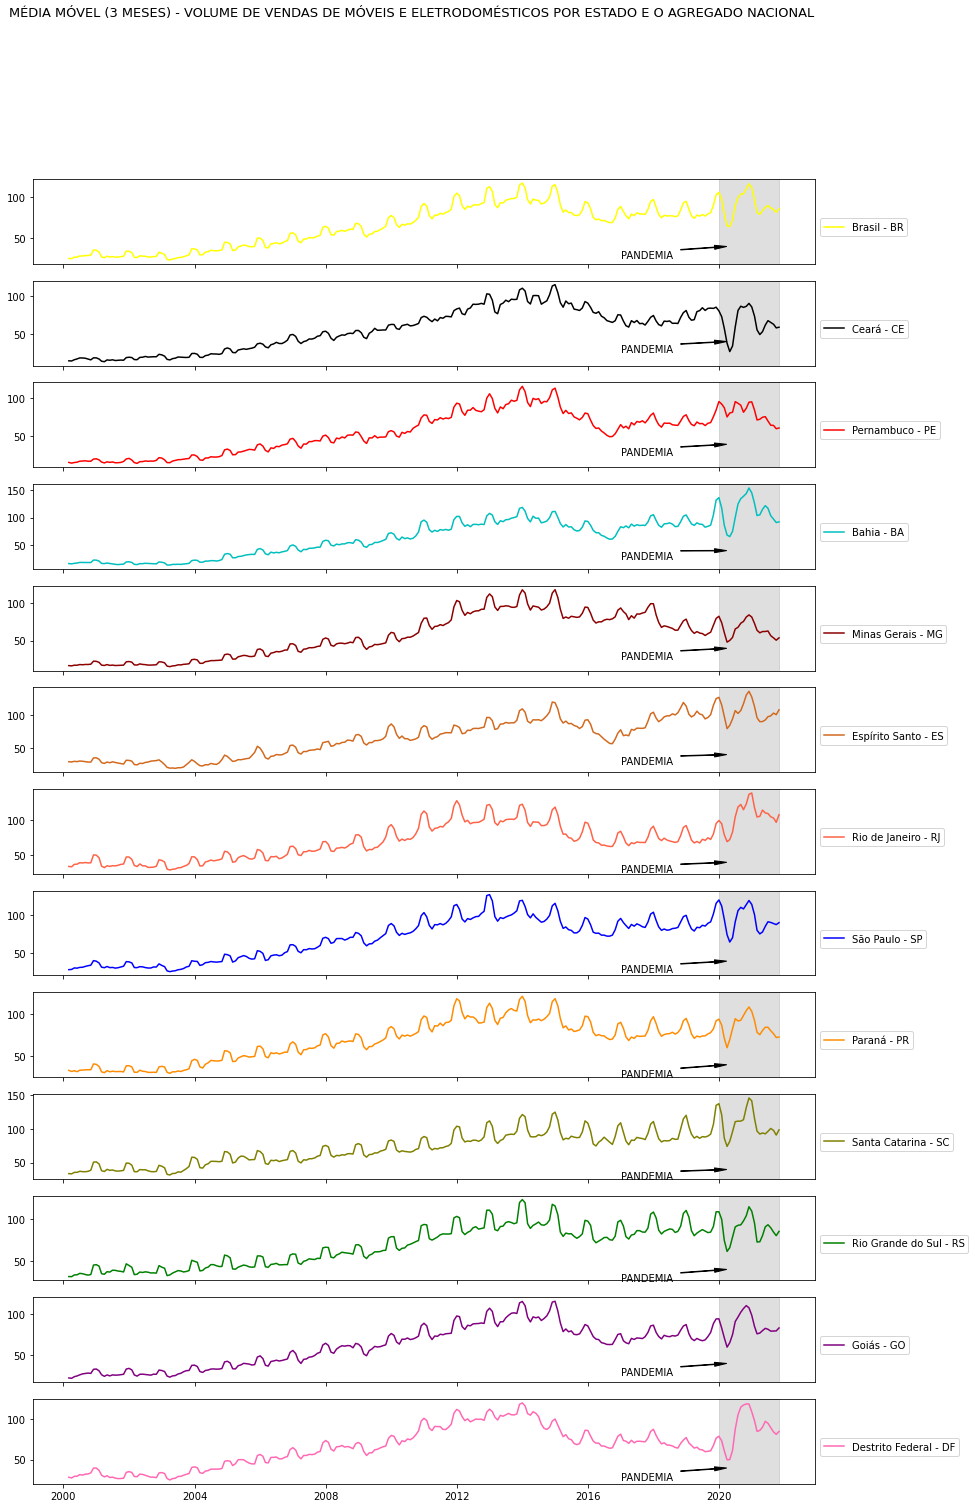

In [22]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13) = plt.subplots(13, sharex=True, figsize=(14,24))

ax1.plot(df_m_e['media_movel_BR'], color= 'yellow')
ax1.legend(["Brasil - BR"], bbox_to_anchor = (1.0, 0.6))

ax2.plot(df_m_e['media_movel_CE'], color= 'k')
ax2.legend(["Ceará - CE"], bbox_to_anchor = (1.0, 0.6))

ax3.plot(df_m_e['media_movel_PE'], color= 'r')
ax3.legend(["Pernambuco - PE"], bbox_to_anchor = (1.0, 0.6))

ax4.plot(df_m_e['media_movel_BA'], color= 'c')
ax4.legend(["Bahia - BA"], bbox_to_anchor = (1.0, 0.6))

ax5.plot(df_m_e['media_movel_MG'], color= 'darkred')
ax5.legend(["Minas Gerais - MG"], bbox_to_anchor = (1.0, 0.6))

ax6.plot(df_m_e['media_movel_ES'], color= 'chocolate')
ax6.legend(["Espírito Santo - ES"], bbox_to_anchor = (1.0, 0.6))

ax7.plot(df_m_e['media_movel_RJ'], color = 'tomato')
ax7.legend(["Rio de Janeiro - RJ"], bbox_to_anchor = (1.0, 0.6))

ax8.plot(df_m_e['media_movel_SP'], color = 'blue')
ax8.legend(["São Paulo - SP"], bbox_to_anchor = (1.0, 0.6))

ax9.plot(df_m_e['media_movel_PR'], color = 'darkorange')
ax9.legend(["Paraná - PR"], bbox_to_anchor = (1.0, 0.6))

ax10.plot(df_m_e['media_movel_SC'], color = 'olive')
ax10.legend(["Santa Catarina - SC"], bbox_to_anchor = (1.0, 0.6))

ax11.plot(df_m_e['media_movel_RS'], color = 'green')
ax11.legend(["Rio Grande do Sul - RS"], bbox_to_anchor = (1.0, 0.6))

ax12.plot(df_m_e['media_movel_GO'], color = 'purple')
ax12.legend(["Goiás - GO"], bbox_to_anchor = (1.0, 0.6))

ax13.plot(df_m_e['media_movel_DF'], color = 'hotpink')
ax13.legend(["Destrito Federal - DF"], bbox_to_anchor = (1.0, 0.6))


fig.suptitle('MÉDIA MÓVEL (3 MESES) - VOLUME DE VENDAS DE MÓVEIS E ELETRODOMÉSTICOS POR ESTADO E O AGREGADO NACIONAL', fontsize=13)


# ÁREAS RACHURADAS
ax1.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2021-11-01'), color='gray', alpha=0.25)
ax2.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2021-11-01'), color='gray', alpha=0.25)
ax3.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2021-11-01'), color='gray', alpha=0.25)
ax4.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2021-11-01'), color='gray', alpha=0.25)
ax5.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2021-11-01'), color='gray', alpha=0.25)
ax6.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2021-11-01'), color='gray', alpha=0.25)
ax7.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2021-11-01'), color='gray', alpha=0.25)
ax8.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2021-11-01'), color='gray', alpha=0.25)
ax9.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2021-11-01'), color='gray', alpha=0.25)
ax10.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2021-11-01'), color='gray', alpha=0.25)
ax11.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2021-11-01'), color='gray', alpha=0.25)
ax12.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2021-11-01'), color='gray', alpha=0.25)
ax13.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2021-11-01'), color='gray', alpha=0.25)



# CARACTERÍSTICAS DAS SETAS 
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.1)

# SETAS 
ax1.annotate(
    "PANDEMIA", xy=(pd.to_datetime('2020-06-01'), 40),
    xytext=(pd.to_datetime('2017-01-01'), 25),
    arrowprops=arrow_properties)


ax2.annotate(
    "PANDEMIA", xy=(pd.to_datetime('2020-06-01'), 40),
    xytext=(pd.to_datetime('2017-01-01'), 25),
    arrowprops=arrow_properties)


ax3.annotate(
    "PANDEMIA", xy=(pd.to_datetime('2020-06-01'), 40),
    xytext=(pd.to_datetime('2017-01-01'), 25),
    arrowprops=arrow_properties)


ax4.annotate(
    "PANDEMIA", xy=(pd.to_datetime('2020-06-01'), 40),
    xytext=(pd.to_datetime('2017-01-01'), 25),
    arrowprops=arrow_properties)


ax5.annotate(
    "PANDEMIA", xy=(pd.to_datetime('2020-06-01'), 40),
    xytext=(pd.to_datetime('2017-01-01'), 25),
    arrowprops=arrow_properties)


ax6.annotate(
    "PANDEMIA", xy=(pd.to_datetime('2020-06-01'), 40),
    xytext=(pd.to_datetime('2017-01-01'), 25),
    arrowprops=arrow_properties)


ax7.annotate(
    "PANDEMIA", xy=(pd.to_datetime('2020-06-01'), 40),
    xytext=(pd.to_datetime('2017-01-01'), 25),
    arrowprops=arrow_properties)


ax8.annotate(
    "PANDEMIA", xy=(pd.to_datetime('2020-06-01'), 40),
    xytext=(pd.to_datetime('2017-01-01'), 25),
    arrowprops=arrow_properties)


ax9.annotate(
    "PANDEMIA", xy=(pd.to_datetime('2020-06-01'), 40),
    xytext=(pd.to_datetime('2017-01-01'), 25),
    arrowprops=arrow_properties)


ax10.annotate(
    "PANDEMIA", xy=(pd.to_datetime('2020-06-01'), 40),
    xytext=(pd.to_datetime('2017-01-01'), 25),
    arrowprops=arrow_properties)


ax11.annotate(
    "PANDEMIA", xy=(pd.to_datetime('2020-06-01'), 40),
    xytext=(pd.to_datetime('2017-01-01'), 25),
    arrowprops=arrow_properties)


ax12.annotate(
    "PANDEMIA", xy=(pd.to_datetime('2020-06-01'), 40),
    xytext=(pd.to_datetime('2017-01-01'), 25),
    arrowprops=arrow_properties)


ax13.annotate(
    "PANDEMIA", xy=(pd.to_datetime('2020-06-01'), 40),
    xytext=(pd.to_datetime('2017-01-01'), 25),
    arrowprops=arrow_properties)



plt.show()

In [23]:
df_m_e_colormap = df_m_e.loc[df_m_e.index >= '2019-11-01']
df_m_e_colormap = df_m_e_colormap.drop(columns=['var', 'setor', 'BR', 'CE', 'PE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',\
                                                'RS', 'GO', 'DF'])

lista_datas = []
for data in df_m_e_colormap.index:
    lista_datas.append(data.date())
df_m_e_colormap.index = lista_datas

Text(0.5, 0.98, 'Mapa de Calor da média móvel do volume de vendas de móveis e eletrodomésticos em cada UF e no Brasil')

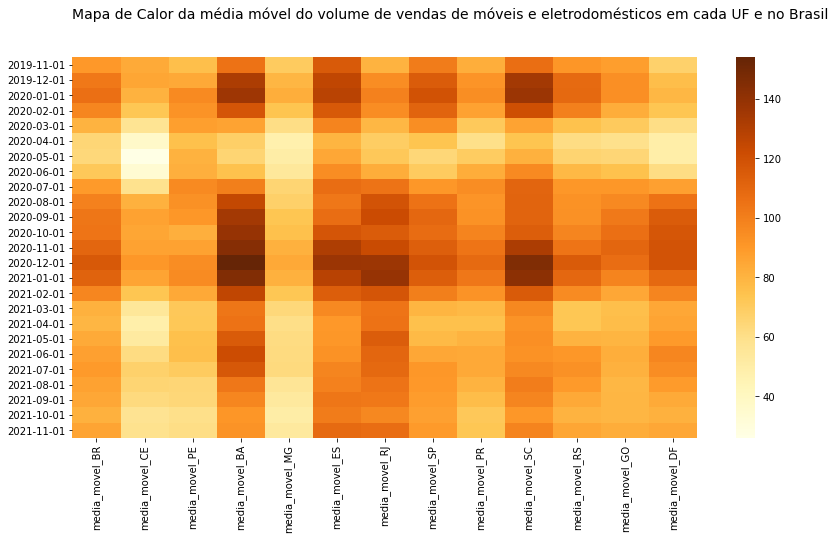

In [24]:
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(df_m_e_colormap, cmap='YlOrBr', ax=ax)

fig.suptitle('Mapa de Calor da média móvel do volume de vendas de móveis e eletrodomésticos em cada UF e no Brasil', fontsize=14)

##### Análise da variação percentual na pandemia

Text(0.5, 1.0, 'VARIAÇÕES PERCENTUAIS DE CADA UF E DO AGREGADO NACIONAL (2019.04 - 2020.04)')

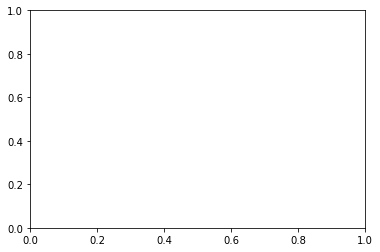

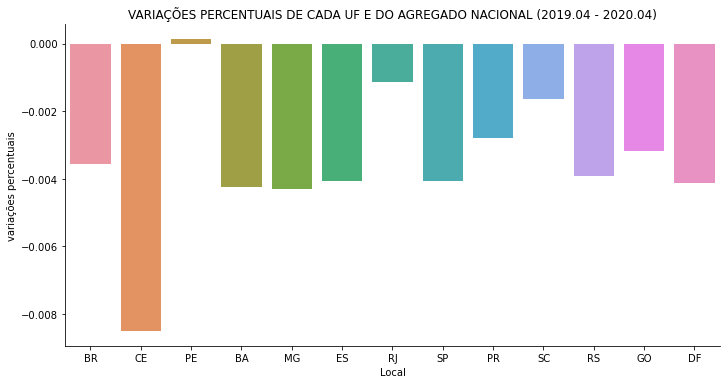

In [25]:
df_m_e_pandemia = df_m_e.loc[df_m_e.index >= '2019-04-01']
df_m_e_pandemia = df_m_e_pandemia.loc[df_m_e_pandemia.index <= '2020-04-01']

variacoes = []

def variacao_percentual(coluna):
    lista = []
    for i in coluna:
        lista.append(i)
    VF = lista[-1]
    VI = lista[0]
    return (VF/VI - 1)/100

variacoes.append(variacao_percentual(df_m_e_pandemia['BR']))
variacoes.append(variacao_percentual(df_m_e_pandemia['CE']))
variacoes.append(variacao_percentual(df_m_e_pandemia['PE']))
variacoes.append(variacao_percentual(df_m_e_pandemia['BA']))
variacoes.append(variacao_percentual(df_m_e_pandemia['MG']))
variacoes.append(variacao_percentual(df_m_e_pandemia['ES']))
variacoes.append(variacao_percentual(df_m_e_pandemia['RJ']))
variacoes.append(variacao_percentual(df_m_e_pandemia['SP']))
variacoes.append(variacao_percentual(df_m_e_pandemia['PR']))
variacoes.append(variacao_percentual(df_m_e_pandemia['SC']))
variacoes.append(variacao_percentual(df_m_e_pandemia['RS']))
variacoes.append(variacao_percentual(df_m_e_pandemia['GO']))
variacoes.append(variacao_percentual(df_m_e_pandemia['DF']))


df_m_e_pandemia['variações percentuais'] = variacoes
lista_datas = []
for data in df_m_e_pandemia.index:
    lista_datas.append(data.date())
df_m_e_pandemia.index = lista_datas

df_m_e_pandemia = df_m_e_pandemia.filter(items=['variações percentuais'])
df_m_e_pandemia['Local'] = ['BR', 'CE', 'PE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'GO', 'DF']

ax = plt.subplots()
ax = sns.catplot(x='Local', y="variações percentuais", kind="bar", aspect=2, data=df_m_e_pandemia)
plt.title('VARIAÇÕES PERCENTUAIS DE CADA UF E DO AGREGADO NACIONAL (2019.04 - 2020.04)')

In [26]:
df_m_e_pandemia.head()

,variações percentuais,Local
2019-04-01,-0.003563,BR
2019-05-01,-0.008509,CE
2019-06-01,0.000138,PE
2019-07-01,-0.004249,BA
2019-08-01,-0.004314,MG


##### Destacando SP em relação a BR

C:\Users\campe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  """


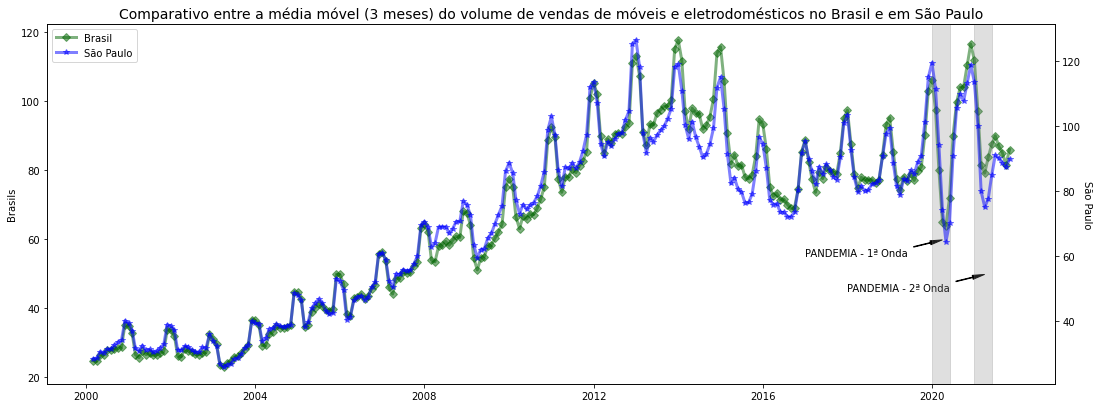

In [27]:
fig = plt.figure(figsize=(14, 5))
line_weight = 3
alpha = .5
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
#ax3 = fig.add_axes()

ax2 = ax1.twinx()
#ax3 = ax2.twinx()

lns1 = ax1.plot(df_m_e['media_movel_BR'], color='darkgreen', lw=line_weight, alpha=alpha,  marker='D', label='Brasil')
lns2 = ax2.plot(df_m_e['media_movel_SP'], color='blue', lw=line_weight, alpha=alpha,  marker='*', label='São Paulo')



leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='upper left')

plt.title('Comparativo entre a média móvel (3 meses) do volume de vendas de móveis e eletrodomésticos no Brasil e em São Paulo', fontsize=14)


ax1.set_ylabel('Brasils', color='k')
ax2.set_ylabel('São Paulo', color='k', rotation=-90, labelpad=11)


#DESTAQUE CINZA
plt.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2020-06-01'), color='gray', alpha=0.25)
plt.axvspan(pd.to_datetime('2021-01-01'),pd.to_datetime('2021-06-01'), color='gray', alpha=0.25)


# CARACTERÍSTICAS DAS SETAS 
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.1)

# SETA 
ax1.annotate(
    "PANDEMIA - 1ª Onda", xy=(pd.to_datetime('2020-05-01'), 60),
    xytext=(pd.to_datetime('2017-01-01'), 55),
    arrowprops=arrow_properties)

# 2 SETA 
ax1.annotate(
    "PANDEMIA - 2ª Onda", xy=(pd.to_datetime('2021-05-01'), 50),
    xytext=(pd.to_datetime('2018-01-01'), 45),
    arrowprops=arrow_properties)


plt.show()

##### Comparando os setores no estado de SP

In [28]:
df_setores_SP = df.filter(items=['data', 'setor', 'SP'])

In [29]:
df_setores_SP['media_movel'] = df_setores_SP.SP.rolling(3).mean()

In [30]:
df_setores_SP.head()

,data,setor,SP,media_movel
0,2000-01-01,Combustíveis e lubrificantes,89.1,NaN
1,2000-01-01,"Hipermercados, supermercados, produtos aliment...",49.4,NaN
2,2000-01-01,"Tecidos, vestuário e calçados",49.0,62.500000
3,2000-01-01,Móveis e eletrodomésticos,27.8,42.066667
4,2000-01-01,"Artigos farmacêuticos, médicos, ortopédicos, d...",NaN,NaN


In [31]:
setor1 = df_setores_SP.loc[df_setores_SP['setor'] == 'Combustíveis e lubrificantes']
setor1.index = setor1['data']
setor1 = setor1.filter(items=['SP', 'media_movel'])



setor2 = df_setores_SP.loc[df_setores_SP['setor'] == 'Hipermercados, supermercados, produtos alimentícios, bebidas e fumo']
setor2.index = setor2['data']
setor2 = setor2.filter(items=['SP', 'media_movel'])



setor3 = df_setores_SP.loc[df_setores_SP['setor'] == 'Tecidos, vestuário e calçados']
setor3.index = setor3['data']
setor3 = setor3.filter(items=['SP', 'media_movel'])



setor4 = df_setores_SP.loc[df_setores_SP['setor'] == 'Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos']
setor4.index = setor4['data']
setor4 = setor4.filter(items=['SP', 'media_movel'])



setor5 = df_setores_SP.loc[df_setores_SP['setor'] == 'Livros, jornais, revistas e papelaria']
setor5.index = setor5['data']
setor5 = setor5.filter(items=['SP', 'media_movel'])



setor6 = df_setores_SP.loc[df_setores_SP['setor'] == 'Equipamentos e materiais para escritório, informática e comunicação']
setor6.index = setor6['data']
setor6 = setor6.filter(items=['SP', 'media_movel'])



setor7 = df_setores_SP.loc[df_setores_SP['setor'] == 'Outros artigos de uso pessoal e doméstico']
setor7.index = setor7['data']
setor7 = setor7.filter(items=['SP', 'media_movel'])

C:\Users\campe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  """


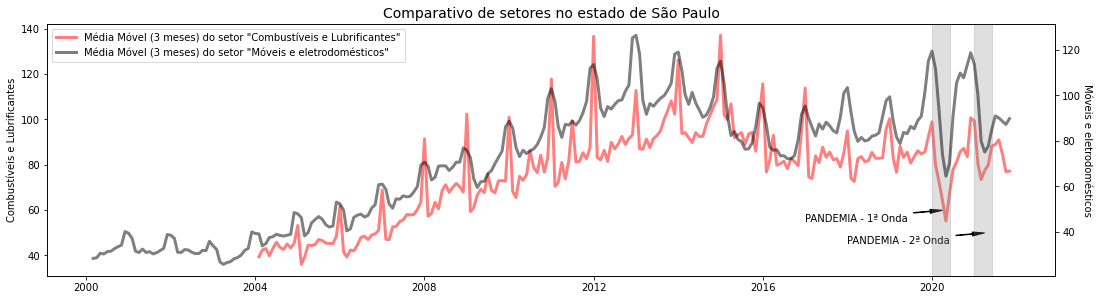

In [32]:
fig = plt.figure(figsize=(14, 3.5))
line_weight = 3
alpha = .5
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
#ax3 = fig.add_axes()


ax2 = ax1.twinx()
#ax3 = ax2.twinx()

lns1 = ax1.plot(setor1['media_movel'], color='r', lw=line_weight, alpha=alpha, label='Média Móvel (3 meses) do setor "Combustíveis e Lubrificantes"')
lns2 = ax2.plot(df_m_e['media_movel_SP'], color='k', lw=line_weight, alpha=alpha, label='Média Móvel (3 meses) do setor "Móveis e eletrodomésticos"')

ax1.set_ylabel('Combustíveis e Lubrificantes', color='k')
ax2.set_ylabel('Móveis e eletrodomésticos', color='k', rotation=-90, labelpad=11)


#DESTAQUE CINZA
plt.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2020-06-01'), color='gray', alpha=0.25)
plt.axvspan(pd.to_datetime('2021-01-01'),pd.to_datetime('2021-06-01'), color='gray', alpha=0.25)


# CARACTERÍSTICAS DAS SETAS 
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.1)

# SETA 
ax1.annotate(
    "PANDEMIA - 1ª Onda", xy=(pd.to_datetime('2020-05-01'), 60),
    xytext=(pd.to_datetime('2017-01-01'), 55),
    arrowprops=arrow_properties)

# 2 SETA 
ax1.annotate(
    "PANDEMIA - 2ª Onda", xy=(pd.to_datetime('2021-05-01'), 50),
    xytext=(pd.to_datetime('2018-01-01'), 45),
    arrowprops=arrow_properties)



leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=2)

plt.title('Comparativo de setores no estado de São Paulo', fontsize=14)
plt.show()

C:\Users\campe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  """


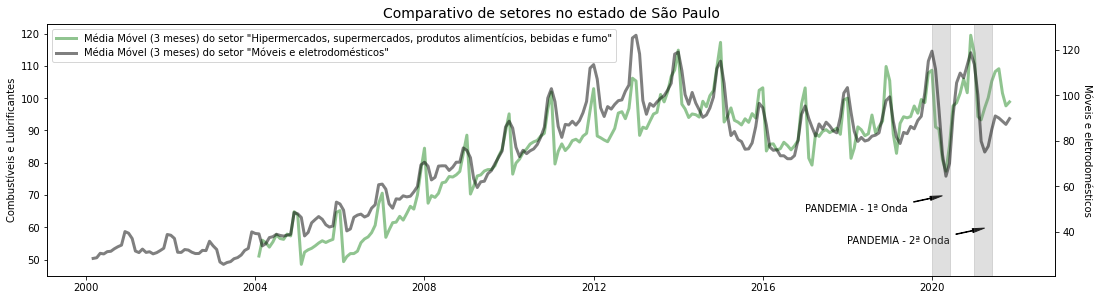

In [33]:
fig = plt.figure(figsize=(14, 3.5))
line_weight = 3
alpha = .5
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
#ax3 = fig.add_axes()


ax2 = ax1.twinx()
#ax3 = ax2.twinx()

lns1 = ax1.plot(setor2['media_movel'], color='forestgreen', lw=line_weight, alpha=alpha, label='Média Móvel (3 meses) do setor "Hipermercados, supermercados, produtos alimentícios, bebidas e fumo"')
lns2 = ax2.plot(df_m_e['media_movel_SP'], color='k', lw=line_weight, alpha=alpha, label='Média Móvel (3 meses) do setor "Móveis e eletrodomésticos"')

ax1.set_ylabel('Combustíveis e Lubrificantes', color='k')
ax2.set_ylabel('Móveis e eletrodomésticos', color='k', rotation=-90, labelpad=11)


#DESTAQUE CINZA
plt.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2020-06-01'), color='gray', alpha=0.25)
plt.axvspan(pd.to_datetime('2021-01-01'),pd.to_datetime('2021-06-01'), color='gray', alpha=0.25)


# CARACTERÍSTICAS DAS SETAS 
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.1)

# SETA 
ax1.annotate(
    "PANDEMIA - 1ª Onda", xy=(pd.to_datetime('2020-05-01'), 70),
    xytext=(pd.to_datetime('2017-01-01'), 65),
    arrowprops=arrow_properties)

# 2 SETA 
ax1.annotate(
    "PANDEMIA - 2ª Onda", xy=(pd.to_datetime('2021-05-01'), 60),
    xytext=(pd.to_datetime('2018-01-01'), 55),
    arrowprops=arrow_properties)



leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=2)

plt.title('Comparativo de setores no estado de São Paulo', fontsize=14)
plt.show()

C:\Users\campe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  """


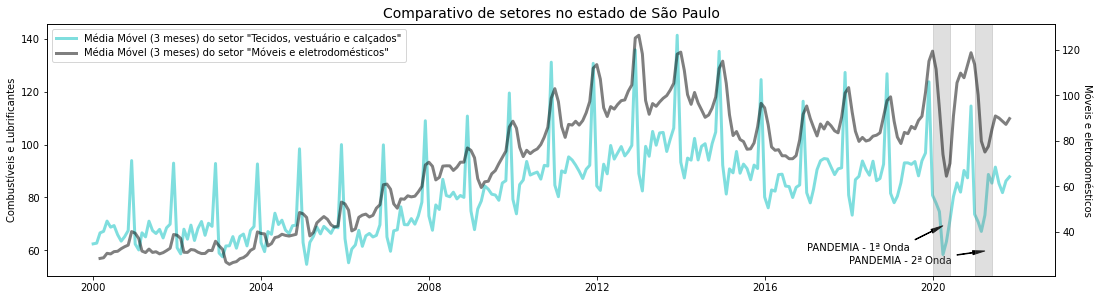

In [34]:
fig = plt.figure(figsize=(14, 3.5))
line_weight = 3
alpha = .5
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
#ax3 = fig.add_axes()


ax2 = ax1.twinx()
#ax3 = ax2.twinx()

lns1 = ax1.plot(setor3['media_movel'], color='c', lw=line_weight, alpha=alpha, label='Média Móvel (3 meses) do setor "Tecidos, vestuário e calçados"')
lns2 = ax2.plot(df_m_e['media_movel_SP'], color='k', lw=line_weight, alpha=alpha, label='Média Móvel (3 meses) do setor "Móveis e eletrodomésticos"')

ax1.set_ylabel('Combustíveis e Lubrificantes', color='k')
ax2.set_ylabel('Móveis e eletrodomésticos', color='k', rotation=-90, labelpad=11)



#DESTAQUE CINZA
plt.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2020-06-01'), color='gray', alpha=0.25)
plt.axvspan(pd.to_datetime('2021-01-01'),pd.to_datetime('2021-06-01'), color='gray', alpha=0.25)


# CARACTERÍSTICAS DAS SETAS 
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.1)

# SETA 
ax1.annotate(
    "PANDEMIA - 1ª Onda", xy=(pd.to_datetime('2020-05-01'), 70),
    xytext=(pd.to_datetime('2017-01-01'), 60),
    arrowprops=arrow_properties)

# 2 SETA 
ax1.annotate(
    "PANDEMIA - 2ª Onda", xy=(pd.to_datetime('2021-05-01'), 60),
    xytext=(pd.to_datetime('2018-01-01'), 55),
    arrowprops=arrow_properties)



leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=2)

plt.title('Comparativo de setores no estado de São Paulo', fontsize=14)
plt.show()

C:\Users\campe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  """


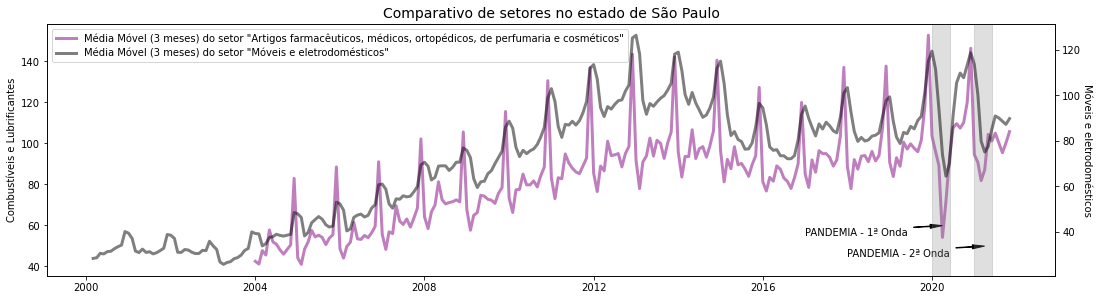

In [35]:
fig = plt.figure(figsize=(14, 3.5))
line_weight = 3
alpha = .5
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
#ax3 = fig.add_axes()


ax2 = ax1.twinx()
#ax3 = ax2.twinx()

lns1 = ax1.plot(setor4['media_movel'], color='purple', lw=line_weight, alpha=alpha, label='Média Móvel (3 meses) do setor "Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos"')
lns2 = ax2.plot(df_m_e['media_movel_SP'], color='k', lw=line_weight, alpha=alpha, label='Média Móvel (3 meses) do setor "Móveis e eletrodomésticos"')

ax1.set_ylabel('Combustíveis e Lubrificantes', color='k')
ax2.set_ylabel('Móveis e eletrodomésticos', color='k', rotation=-90, labelpad=11)



#DESTAQUE CINZA
plt.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2020-06-01'), color='gray', alpha=0.25)
plt.axvspan(pd.to_datetime('2021-01-01'),pd.to_datetime('2021-06-01'), color='gray', alpha=0.25)


# CARACTERÍSTICAS DAS SETAS 
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.1)

# SETA 
ax1.annotate(
    "PANDEMIA - 1ª Onda", xy=(pd.to_datetime('2020-05-01'), 60),
    xytext=(pd.to_datetime('2017-01-01'), 55),
    arrowprops=arrow_properties)

# 2 SETA 
ax1.annotate(
    "PANDEMIA - 2ª Onda", xy=(pd.to_datetime('2021-05-01'), 50),
    xytext=(pd.to_datetime('2018-01-01'), 45),
    arrowprops=arrow_properties)



leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=2)

plt.title('Comparativo de setores no estado de São Paulo', fontsize=14)
plt.show()

C:\Users\campe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  """


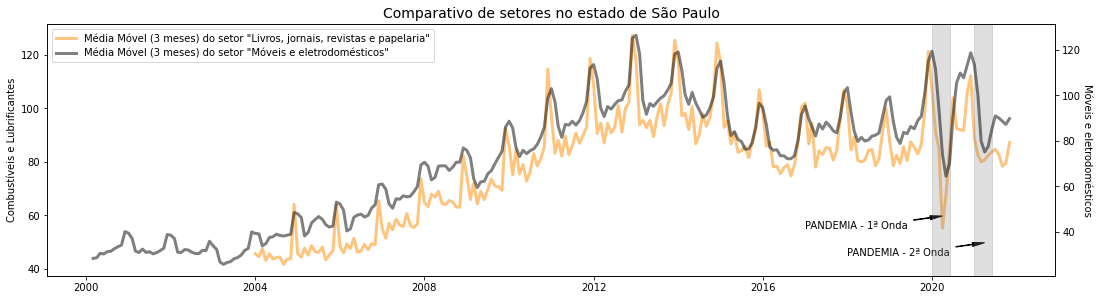

In [36]:
fig = plt.figure(figsize=(14, 3.5))
line_weight = 3
alpha = .5
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
#ax3 = fig.add_axes()


ax2 = ax1.twinx()
#ax3 = ax2.twinx()

lns1 = ax1.plot(setor5['media_movel'], color='darkorange', lw=line_weight, alpha=alpha, label='Média Móvel (3 meses) do setor "Livros, jornais, revistas e papelaria"')
lns2 = ax2.plot(df_m_e['media_movel_SP'], color='k', lw=line_weight, alpha=alpha, label='Média Móvel (3 meses) do setor "Móveis e eletrodomésticos"')

ax1.set_ylabel('Combustíveis e Lubrificantes', color='k')
ax2.set_ylabel('Móveis e eletrodomésticos', color='k', rotation=-90, labelpad=11)



#DESTAQUE CINZA
plt.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2020-06-01'), color='gray', alpha=0.25)
plt.axvspan(pd.to_datetime('2021-01-01'),pd.to_datetime('2021-06-01'), color='gray', alpha=0.25)


# CARACTERÍSTICAS DAS SETAS 
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.1)

# SETA 
ax1.annotate(
    "PANDEMIA - 1ª Onda", xy=(pd.to_datetime('2020-05-01'), 60),
    xytext=(pd.to_datetime('2017-01-01'), 55),
    arrowprops=arrow_properties)

# 2 SETA 
ax1.annotate(
    "PANDEMIA - 2ª Onda", xy=(pd.to_datetime('2021-05-01'), 50),
    xytext=(pd.to_datetime('2018-01-01'), 45),
    arrowprops=arrow_properties)



leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=2)

plt.title('Comparativo de setores no estado de São Paulo', fontsize=14)
plt.show()

C:\Users\campe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  """


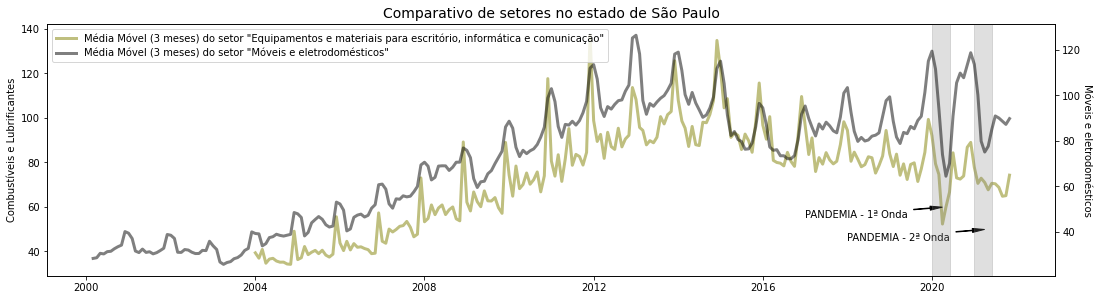

In [37]:
fig = plt.figure(figsize=(14, 3.5))
line_weight = 3
alpha = .5
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
#ax3 = fig.add_axes()


ax2 = ax1.twinx()
#ax3 = ax2.twinx()

lns1 = ax1.plot(setor6['media_movel'], color='olive', lw=line_weight, alpha=alpha, label='Média Móvel (3 meses) do setor "Equipamentos e materiais para escritório, informática e comunicação"')
lns2 = ax2.plot(df_m_e['media_movel_SP'], color='k', lw=line_weight, alpha=alpha, label='Média Móvel (3 meses) do setor "Móveis e eletrodomésticos"')

ax1.set_ylabel('Combustíveis e Lubrificantes', color='k')
ax2.set_ylabel('Móveis e eletrodomésticos', color='k', rotation=-90, labelpad=11)



#DESTAQUE CINZA
plt.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2020-06-01'), color='gray', alpha=0.25)
plt.axvspan(pd.to_datetime('2021-01-01'),pd.to_datetime('2021-06-01'), color='gray', alpha=0.25)


# CARACTERÍSTICAS DAS SETAS 
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.1)

# SETA 
ax1.annotate(
    "PANDEMIA - 1ª Onda", xy=(pd.to_datetime('2020-05-01'), 60),
    xytext=(pd.to_datetime('2017-01-01'), 55),
    arrowprops=arrow_properties)

# 2 SETA 
ax1.annotate(
    "PANDEMIA - 2ª Onda", xy=(pd.to_datetime('2021-05-01'), 50),
    xytext=(pd.to_datetime('2018-01-01'), 45),
    arrowprops=arrow_properties)



leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=2)

plt.title('Comparativo de setores no estado de São Paulo', fontsize=14)
plt.show()

C:\Users\campe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  """


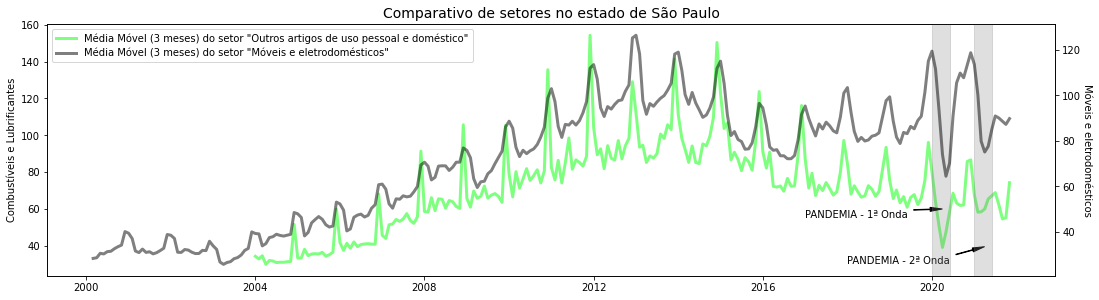

In [38]:
fig = plt.figure(figsize=(14, 3.5))
line_weight = 3
alpha = .5
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
#ax3 = fig.add_axes()


ax2 = ax1.twinx()
#ax3 = ax2.twinx()

lns1 = ax1.plot(setor7['media_movel'], color='lime', lw=line_weight, alpha=alpha, label='Média Móvel (3 meses) do setor "Outros artigos de uso pessoal e doméstico"')
lns2 = ax2.plot(df_m_e['media_movel_SP'], color='k', lw=line_weight, alpha=alpha, label='Média Móvel (3 meses) do setor "Móveis e eletrodomésticos"')

ax1.set_ylabel('Combustíveis e Lubrificantes', color='k')
ax2.set_ylabel('Móveis e eletrodomésticos', color='k', rotation=-90, labelpad=11)



#DESTAQUE CINZA
plt.axvspan(pd.to_datetime('2020-01-01'),pd.to_datetime('2020-06-01'), color='gray', alpha=0.25)
plt.axvspan(pd.to_datetime('2021-01-01'),pd.to_datetime('2021-06-01'), color='gray', alpha=0.25)


# CARACTERÍSTICAS DAS SETAS 
arrow_properties = dict(
    facecolor="black", width=0.5,
    headwidth=4, shrink=0.1)

# SETA 
ax1.annotate(
    "PANDEMIA - 1ª Onda", xy=(pd.to_datetime('2020-05-01'), 60),
    xytext=(pd.to_datetime('2017-01-01'), 55),
    arrowprops=arrow_properties)

# 2 SETA 
ax1.annotate(
    "PANDEMIA - 2ª Onda", xy=(pd.to_datetime('2021-05-01'), 40),
    xytext=(pd.to_datetime('2018-01-01'), 30),
    arrowprops=arrow_properties)



leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=2)

plt.title('Comparativo de setores no estado de São Paulo', fontsize=14)
plt.show()

In [39]:
lista_datas = []
for data in df_setores_SP['data']:
    lista_datas.append(data.date())
df_setores_SP['data'] = lista_datas


Text(0.5, 1.0, 'Média do volume vendido em cada setor (2000.1 - 2021.11) em São Paulo')

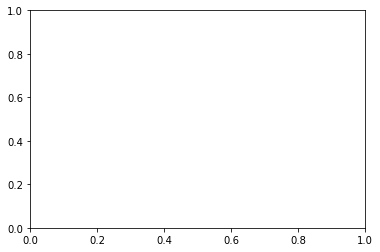

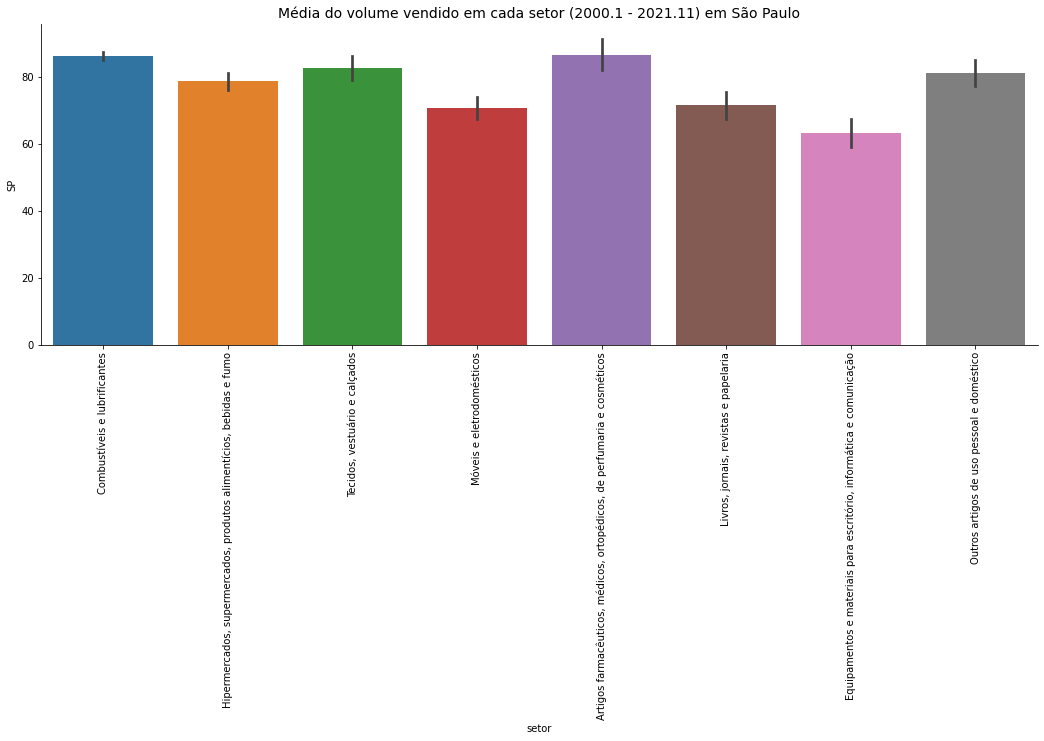

In [40]:
ax = plt.subplots()
ax = sns.catplot(x="setor", y="SP",
            kind="bar", aspect=3, data=df_setores_SP)
plt.xticks(rotation=90)

plt.title('Média do volume vendido em cada setor (2000.1 - 2021.11) em São Paulo', fontsize=14)

## Parte C

##### Lendo a base de dados

In [41]:
df_rendimento = pd.read_csv(r'C:\Users\campe\Documents\Prova estágio\rendimento_efetivo_real.csv', encoding='UTF-8')

In [42]:
df_rendimento.head()

,Data;Rendimento real médio de todos os trabalhos efetivos mensais - R$ Penúltimo mês da série - Instituto Brasileiro de Geografia e Estatística,Pesquisa Nacional por Amostra de Domicílios Contínua (IBGE/PNAD Contínua) - PNADC12_RRTE12;
0,2012.03;2606;,NaN
1,2012.04;2457;,NaN
2,2012.05;2453;,NaN
3,2012.06;2459;,NaN
4,2012.07;2470;,NaN


##### Renomeando as colunas e separando os dados em colunas diferentes

In [43]:
coluna = ['data ; renda', 'PNAD']
df_rendimento.columns = coluna

df_rendimento = df_rendimento.drop(columns = 'PNAD')

In [44]:
df_rendimento.head()

,data ; renda
0,2012.03;2606;
1,2012.04;2457;
2,2012.05;2453;
3,2012.06;2459;
4,2012.07;2470;


In [45]:
lista_de_listas = []
lista_data = []
lista_renda = []

for valor in df_rendimento['data ; renda']:
    lista_de_listas.append(valor.split(';'))
    
for sublista in lista_de_listas:
    lista_data.append(sublista[0])
    lista_renda.append(sublista[1])
    
df_rendimento['data'] = lista_data
df_rendimento['renda'] = lista_renda
df_rendimento = df_rendimento.drop(columns=['data ; renda'])

In [46]:
df_rendimento.head()

,data,renda
0,2012.03,2606
1,2012.04,2457
2,2012.05,2453
3,2012.06,2459
4,2012.07,2470


##### Alterando a classe (type) dos dados

In [47]:
df_rendimento['data'] = pd.to_datetime(df_rendimento['data'])

In [48]:
lista_renda = []

for valor in df_rendimento['renda']:
    if valor == '-':
        valor = None
    else:
        valor = float(valor)
    lista_renda.append(valor)
    
df_rendimento['renda'] = lista_renda

In [49]:
df_rendimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    116 non-null    datetime64[ns]
 1   renda   116 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


In [50]:
df_rendimento.head()

,data,renda
0,2012-03-01,2606.0
1,2012-04-01,2457.0
2,2012-05-01,2453.0
3,2012-06-01,2459.0
4,2012-07-01,2470.0


In [51]:
df_rendimento.tail()

,data,renda
111,2021-06-01,2588.0
112,2021-07-01,2572.0
113,2021-08-01,2545.0
114,2021-09-01,2498.0
115,2021-10-01,2456.0


#### Concatenando os DataFrames referente as duas bases de dados

In [52]:
df_rendimento.index = df_rendimento['data']
df_rendimento = df_rendimento.drop(columns=['data'])

In [53]:
df_c = df_m_e.loc[df_m_e.index >= '2012-03-01']
df_c = df_c.loc[df_c.index <= '2021-10-01']

df_concat = pd.concat([df_c['setor'], df_c['BR'], df_rendimento], axis=1, sort=False)

In [54]:
df_concat.rename(columns={'BR':'Volume - BR'},inplace=True)

In [55]:
df_concat.head()

,setor,Volume - BR,renda
data,,,
2012-03-01,Móveis e eletrodomésticos,90.9,2606.0
2012-04-01,Móveis e eletrodomésticos,82.6,2457.0
2012-05-01,Móveis e eletrodomésticos,93.4,2453.0
2012-06-01,Móveis e eletrodomésticos,87.0,2459.0
2012-07-01,Móveis e eletrodomésticos,90.5,2470.0


In [56]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 2012-03-01 to 2021-10-01
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   setor        116 non-null    object 
 1   Volume - BR  116 non-null    float64
 2   renda        116 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.6+ KB


##### Gráficos e análises das duas bases juntas

Text(0.5, 0.98, 'Comparação entre o rendimento e o volume de vendas do setor de móveis e eletrodomésticos no Brasil')

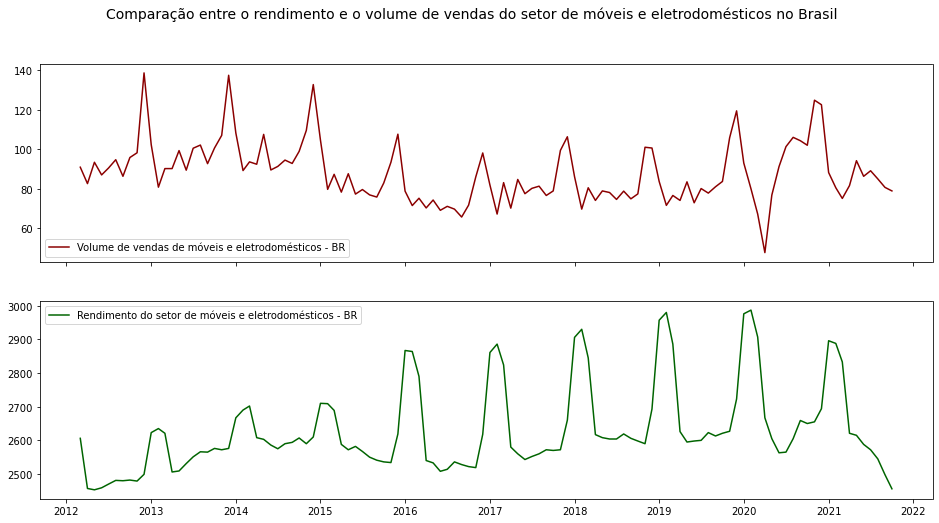

In [57]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(16,8))

ax1.plot(df_concat['Volume - BR'], color= 'darkred', label='Volume de vendas de móveis e eletrodomésticos - BR')
ax1.legend(loc="lower left")

ax2.plot(df_concat['renda'], color= 'darkgreen', label='Rendimento do setor de móveis e eletrodomésticos - BR')
ax2.legend(loc="upper left")

fig.suptitle('Comparação entre o rendimento e o volume de vendas do setor de móveis e eletrodomésticos no Brasil', fontsize=14)    